In [1]:
#한글 폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 3s (3,730 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 121666 files and dire

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
from google.colab import drive
drive.mount('/content/gdrive')
!ln -s /content/gdrive/My\ Drive/ /mydrive
!ls /mydrive

Mounted at /content/gdrive
'0_[강북삼성병원 종합건진센터] 민병윤님의 종합건진결과입니다._231122.zip'   Untitled
'Colab Notebooks'							    건강검진.html
 final_23년9월평일_버스코드합치는중-병윤.xlsx				   '내일로 숙박편.hwp'
 GoodNotes								    사진
'My Drive'								    산업안전기사
'NEBOSH IG'								    신분증.jpeg
'NEBOSH v2'


In [7]:
# os, pandas, pyplot, seaborn 라이브러리 불러오기
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
import warnings

# 쓸데없는 경고 메시지 숨기기
warnings.filterwarnings('ignore')

In [9]:
#한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumGothic')

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 원본 데이터 전처리



In [134]:
#22년,23년 7770버스 데이터 불러오기 (3,6,9,12월)
df1=pd.read_csv('/content/final_22년7770.csv')
df2=pd.read_csv('/content/final_23년7770.csv')
merged_df = pd.concat([df1, df2], ignore_index=True)
merged_df.to_csv('22년, 23년 통합 승차데이터.csv', index=False, encoding='cp949')

In [135]:
#22년,23년 3,6,9,12월 평일 데이터 불러오기(7770노선)
#23년 9월 주말 데이터 불러오기(전노선)
df_weekday=pd.read_csv('/content/22년, 23년 통합 승차데이터.csv',encoding='cp949')
df_weekend=pd.read_excel('/content/23년9월주말_최종.xlsx')

In [136]:
#평일 데이터 확인
df_weekday.head()

,Unnamed: 0,노선,일자,정류장순번,정류장,4,5,6,7,8,...,18,19,20,21,22,23,0,1,2,3
0,0,7770,2022-06-01(수),0,수원역,10,8,12,15,14,...,38,19,37,40,23,7,0,0,0,0
1,1,7770,2022-06-01(수),1,고등동구터미널,0,1,2,3,2,...,0,3,1,1,1,0,0,0,0,0
2,2,7770,2022-06-01(수),2,고등동사거리,1,3,0,3,1,...,1,3,1,0,1,1,0,0,0,0
3,3,7770,2022-06-01(수),3,수원여자고교,1,5,2,5,7,...,3,3,0,5,1,0,0,0,0,0
4,4,7770,2022-06-01(수),4,병무청입구,1,3,2,3,4,...,4,1,3,3,6,0,0,0,0,0


In [137]:
#주말 데이터 확인
df_weekend.head()

,Unnamed: 0,노선,일,일자,정류장순번,정류장,위도,경도,모바일단축번호,도시명,...,18,19,20,21,22,23,0,1,2,3
0,126,1007-1,2023-09-02(토),2023-09-02(토),4,무궁화전자,37.261767,127.063767,4110,수원시,...,0,0,0,0,0,0,0,0,0,0
1,127,1007-1,0,2023-09-02(토),5,원천삼성아파트,37.265217,127.060650,4094,수원시,...,0,0,0,0,0,0,0,0,0,0
2,128,1007-1,0,2023-09-02(토),6,원일초교,37.266650,127.059367,4088,수원시,...,0,0,0,0,0,0,0,0,0,0
3,129,1007-1,0,2023-09-02(토),7,원천레이크파크아파트,37.269733,127.062950,4108,수원시,...,0,0,0,0,0,0,0,0,0,0
4,130,1007-1,0,2023-09-02(토),8,원천레이크파크아파트,37.269733,127.062950,4108,수원시,...,0,0,0,0,0,0,0,0,0,0


In [138]:
#평일, 주말 데이터를 일자별, 노선별로 그룹화하여 각 시간 별 탑승객 Sum
group_df_weekday = df_weekday.groupby(['일자','노선'])['0','1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16','17','18','19','20','21','22','23'].sum().reset_index()
group_df_weekday
#group_df_weekday = df_weekday.groupby(['일자', '노선'])[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23].sum().reset_index()
group_df_weekend = df_weekend.groupby(['일자', '노선'])[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23].sum().reset_index()

In [139]:
# 일자별, 노선별 오름차순으로 정렬
group_df_weekday = group_df_weekday.sort_values(by=['노선','일자'])
group_df_weekend = group_df_weekend.sort_values(by=['노선','일자'])
print(group_df_weekday.head())
print(group_df_weekend.head())

              일자    노선   0   1   2   3   4    5    6    7  ...   14   15   16  \
0  2022-03-01(화)  7770   8   0   0   0  24   88   95  148  ...  370  336  349   
1  2022-03-02(수)  7770  39  33  16  13  28  144  503  919  ...  222  237  369   
2  2022-03-03(목)  7770  53  33  23  18  34  151  472  895  ...  200  319  427   
3  2022-03-04(금)  7770  51  12  24   6  44  124  498  888  ...  230  314  421   
4  2022-03-07(월)  7770  56  22  19  12  27  142  555  872  ...  231  271  387   

    17   18   19   20   21   22   23  
0  322  360  338  318  333  277   91  
1  591  782  715  403  434  345  132  
2  580  804  651  452  414  384  170  
3  571  866  651  394  398  429  195  
4  600  783  731  367  365  292  213  

[5 rows x 26 columns]
               일자    노선   0  1  2  3   4   5   6    7  ...   14   15   16  \
0   2023-09-02(토)  1112   7  0  0  0  16  29  50   80  ...  205  168  171   
21  2023-09-03(일)  1112   2  0  0  0   5  15  28   48  ...  136  170  160   
42  2023-09-09(토)  1112  

In [140]:
#Pandas melt함수를 이용하여 0시~23시 칼럼이 '시간'칼럼의 값이 되도록 데이터 재구조화.
#예시 데이터 출력
#1) 9월4일 월요일 1112노선의 시간별 탑승인원 (평일)
#2) 9월3일 일요일 1112노선의 시간별 탑승인원 (주말)
melted_df_weekday = pd.melt(group_df_weekday, id_vars = ['일자', '노선'], var_name = '시간', value_name = '탑승인원')
melted_df_weekday.sort_values(by=['노선','시간','일자'])
print(melted_df_weekday[(melted_df_weekday['노선']==1112)&(melted_df_weekday['일자']=='2023-09-04(월)')])

melted_df_weekend = pd.melt(group_df_weekend, id_vars = ['일자', '노선'], var_name = '시간', value_name = '탑승인원')
melted_df_weekend.sort_values(by=['노선','시간','일자'])
print(melted_df_weekend[(melted_df_weekend['노선']==1112)&(melted_df_weekend['일자']=='2023-09-03(일)')])


Empty DataFrame
Columns: [일자, 노선, 시간, 탑승인원]
Index: []
                 일자    노선  시간  탑승인원
1     2023-09-03(일)  1112   0     2
190   2023-09-03(일)  1112   1     0
379   2023-09-03(일)  1112   2     0
568   2023-09-03(일)  1112   3     0
757   2023-09-03(일)  1112   4     5
946   2023-09-03(일)  1112   5    15
1135  2023-09-03(일)  1112   6    28
1324  2023-09-03(일)  1112   7    48
1513  2023-09-03(일)  1112   8    60
1702  2023-09-03(일)  1112   9   112
1891  2023-09-03(일)  1112  10   121
2080  2023-09-03(일)  1112  11   120
2269  2023-09-03(일)  1112  12   186
2458  2023-09-03(일)  1112  13   152
2647  2023-09-03(일)  1112  14   136
2836  2023-09-03(일)  1112  15   170
3025  2023-09-03(일)  1112  16   160
3214  2023-09-03(일)  1112  17   153
3403  2023-09-03(일)  1112  18   181
3592  2023-09-03(일)  1112  19   149
3781  2023-09-03(일)  1112  20   128
3970  2023-09-03(일)  1112  21   141
4159  2023-09-03(일)  1112  22   125
4348  2023-09-03(일)  1112  23    48


In [141]:
# 데이터 정보 확인
melted_df_weekday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3576 entries, 0 to 3575
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   일자      3576 non-null   object
 1   노선      3576 non-null   int64 
 2   시간      3576 non-null   object
 3   탑승인원    3576 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 111.9+ KB


In [142]:
# '일자'와 '시간' 칼럼을 문자형 데이터로 변환
melted_df_weekday['일자'] = melted_df_weekday['일자'].astype(str)
melted_df_weekday['시간'] = melted_df_weekday['시간'].astype(str)

melted_df_weekend['일자'] = melted_df_weekend['일자'].astype(str)
melted_df_weekend['시간'] = melted_df_weekend['시간'].astype(str)


In [143]:
# '일자' 칼럼을 '날짜'와 '요일'칼럼으로 나누기
melted_df_weekday[['날짜', '요일']] = melted_df_weekday['일자'].str.extract(r'(\d{4}-\d{2}-\d{2})\((\S+)\)')
melted_df_weekend[['날짜', '요일']] = melted_df_weekend['일자'].str.extract(r'(\d{4}-\d{2}-\d{2})\((\S+)\)')

In [144]:
# 기상데이터와 Join할 수 있도록 Key 칼럼 만들기
melted_df_weekday['Key'] = melted_df_weekday['날짜'] + ' ' + melted_df_weekday['시간']
melted_df_weekend['Key'] = melted_df_weekend['날짜'] + ' ' + melted_df_weekend['시간']

melted_df_weekend

,일자,노선,시간,탑승인원,날짜,요일,Key
0,2023-09-02(토),1112,0,7,2023-09-02,토,2023-09-02 0
1,2023-09-03(일),1112,0,2,2023-09-03,일,2023-09-03 0
2,2023-09-09(토),1112,0,13,2023-09-09,토,2023-09-09 0
3,2023-09-10(일),1112,0,4,2023-09-10,일,2023-09-10 0
4,2023-09-16(토),1112,0,3,2023-09-16,토,2023-09-16 0
...,...,...,...,...,...,...,...
4531,2023-09-16(토),G5100,23,0,2023-09-16,토,2023-09-16 23
4532,2023-09-17(일),G5100,23,0,2023-09-17,일,2023-09-17 23
4533,2023-09-23(토),G5100,23,0,2023-09-23,토,2023-09-23 23
4534,2023-09-24(일),G5100,23,0,2023-09-24,일,2023-09-24 23


# 기상 데이터 전처리

In [145]:
# 기상 데이터 불러오기
df_weather = pd.read_csv('/content/23년 9월 기상데이터.csv',encoding='cp949')
df_weather_all = pd.read_csv('/content/22년, 23년 통합 기상데이터.csv',encoding='cp949')
df_weather.head()
df_weather_all.head()

,지점,지점명,일시,기온,강수량,풍속,습도
0,119,수원,2022-03-01 1:00,5.4,NaN,0.0,47.0
1,119,수원,2022-03-01 2:00,5.6,NaN,0.0,47.0
2,119,수원,2022-03-01 3:00,3.9,0.3,0.3,79.0
3,119,수원,2022-03-01 4:00,3.6,NaN,0.5,92.0
4,119,수원,2022-03-01 5:00,3.9,NaN,1.8,95.0


In [146]:
# 기상데이터 정보 확인
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      696 non-null    int64  
 1   지점명     696 non-null    object 
 2   일시      696 non-null    object 
 3   기온      696 non-null    float64
 4   강수량     141 non-null    float64
 5   풍속      696 non-null    float64
 6   습도      696 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 38.2+ KB


In [147]:
df_weather_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      4386 non-null   int64  
 1   지점명     4386 non-null   object 
 2   일시      4386 non-null   object 
 3   기온      4386 non-null   float64
 4   강수량     371 non-null    float64
 5   풍속      4386 non-null   float64
 6   습도      4386 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 240.0+ KB


In [148]:
# 결측치 처리
# 강수량 칼럼의 null값은 0으로 처리
df_weather['강수량'] = df_weather['강수량'].fillna(0)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      696 non-null    int64  
 1   지점명     696 non-null    object 
 2   일시      696 non-null    object 
 3   기온      696 non-null    float64
 4   강수량     696 non-null    float64
 5   풍속      696 non-null    float64
 6   습도      696 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 38.2+ KB


In [149]:
# 결측치 처리
# 강수량 칼럼의 null값은 0으로 처리
df_weather_all['강수량'] = df_weather_all['강수량'].fillna(0)
df_weather_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      4386 non-null   int64  
 1   지점명     4386 non-null   object 
 2   일시      4386 non-null   object 
 3   기온      4386 non-null   float64
 4   강수량     4386 non-null   float64
 5   풍속      4386 non-null   float64
 6   습도      4386 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 240.0+ KB


In [150]:
df_weather.head()

,지점,지점명,일시,기온,강수량,풍속,습도
0,119,수원,2023-09-01 4:00,18.9,0.0,1.7,97
1,119,수원,2023-09-01 5:00,18.5,0.0,0.0,97
2,119,수원,2023-09-01 6:00,18.6,0.0,0.0,98
3,119,수원,2023-09-01 7:00,19.4,0.0,0.4,99
4,119,수원,2023-09-01 8:00,21.4,0.0,0.9,92


In [151]:
df_weather_all.head()

,지점,지점명,일시,기온,강수량,풍속,습도
0,119,수원,2022-03-01 1:00,5.4,0.0,0.0,47.0
1,119,수원,2022-03-01 2:00,5.6,0.0,0.0,47.0
2,119,수원,2022-03-01 3:00,3.9,0.3,0.3,79.0
3,119,수원,2022-03-01 4:00,3.6,0.0,0.5,92.0
4,119,수원,2022-03-01 5:00,3.9,0.0,1.8,95.0


In [152]:
# 일시 칼럼을 문자열 데이터로 변환
df_weather['일시'] = df_weather['일시'].astype(str)
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 696 entries, 0 to 695
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      696 non-null    int64  
 1   지점명     696 non-null    object 
 2   일시      696 non-null    object 
 3   기온      696 non-null    float64
 4   강수량     696 non-null    float64
 5   풍속      696 non-null    float64
 6   습도      696 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 38.2+ KB


In [153]:
# 일시 칼럼을 문자열 데이터로 변환
df_weather_all['일시'] = df_weather_all['일시'].astype(str)
df_weather_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4386 entries, 0 to 4385
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   지점      4386 non-null   int64  
 1   지점명     4386 non-null   object 
 2   일시      4386 non-null   object 
 3   기온      4386 non-null   float64
 4   강수량     4386 non-null   float64
 5   풍속      4386 non-null   float64
 6   습도      4386 non-null   float64
dtypes: float64(4), int64(1), object(2)
memory usage: 240.0+ KB


In [154]:
# 일시 칼럼에서 :00을 제거하여 Key 칼럼 생성
df_weather['Key'] = df_weather['일시'].str[:-3]
df_weather_all['Key'] = df_weather_all['일시'].str[:-3]

In [155]:
#승차데이터 ~ 기상데이터 Left Join

merge_df_weekday = pd.merge(melted_df_weekday, df_weather_all[['Key', '기온', '강수량', '풍속', '습도']], on='Key', how='left')
merge_df_weekend = pd.merge(melted_df_weekend, df_weather[['Key', '기온', '강수량', '풍속', '습도']], on='Key', how='left')
#merge_df_weekend = pd.merge(melted_df_weekend, df_weather[['Key', '기온(°C)', '강수량(mm)', '풍속(m/s)', '습도(%)']], on='Key', how='left')
#merge_df_weekday.head()
merge_df_weekday.head()

,일자,노선,시간,탑승인원,날짜,요일,Key,기온,강수량,풍속,습도
0,2022-03-01(화),7770,0,8,2022-03-01,화,2022-03-01 0,NaN,NaN,NaN,NaN
1,2022-03-02(수),7770,0,39,2022-03-02,수,2022-03-02 0,-0.2,0.0,1.3,70.0
2,2022-03-03(목),7770,0,53,2022-03-03,목,2022-03-03 0,2.2,0.0,0.9,81.0
3,2022-03-04(금),7770,0,51,2022-03-04,금,2022-03-04 0,1.1,0.0,0.1,70.0
4,2022-03-07(월),7770,0,56,2022-03-07,월,2022-03-07 0,-1.3,0.0,1.4,74.0


In [156]:
merge_df_weekday[['기온', '강수량', '풍속', '습도']] = merge_df_weekday[['기온', '강수량', '풍속', '습도']].fillna(method='bfill')
merge_df_weekend[['Key', '기온', '강수량', '풍속', '습도']] = merge_df_weekend[['Key', '기온', '강수량', '풍속', '습도']].fillna(method='bfill')
merge_df_weekday
merge_df_weekend

,일자,노선,시간,탑승인원,날짜,요일,Key,기온,강수량,풍속,습도
0,2023-09-02(토),1112,0,7,2023-09-02,토,2023-09-02 0,21.3,0.0,1.0,84.0
1,2023-09-03(일),1112,0,2,2023-09-03,일,2023-09-03 0,25.0,0.0,1.6,70.0
2,2023-09-09(토),1112,0,13,2023-09-09,토,2023-09-09 0,21.3,0.0,0.0,86.0
3,2023-09-10(일),1112,0,4,2023-09-10,일,2023-09-10 0,22.2,0.0,0.3,79.0
4,2023-09-16(토),1112,0,3,2023-09-16,토,2023-09-16 0,22.2,0.6,0.1,94.0
...,...,...,...,...,...,...,...,...,...,...,...
4531,2023-09-16(토),G5100,23,0,2023-09-16,토,2023-09-16 23,23.2,0.4,0.3,95.0
4532,2023-09-17(일),G5100,23,0,2023-09-17,일,2023-09-17 23,22.8,0.0,1.0,93.0
4533,2023-09-23(토),G5100,23,0,2023-09-23,토,2023-09-23 23,20.9,0.0,2.8,65.0
4534,2023-09-24(일),G5100,23,0,2023-09-24,일,2023-09-24 23,20.5,0.0,2.9,57.0


# 데이터 시각화

In [157]:
df_weather_weekday = merge_df_weekday.groupby('날짜').agg({'기온': 'mean', '탑승인원': 'sum','강수량': 'sum', '풍속': 'mean', '습도':'mean'}).reset_index()
print(df_weather_weekday)
df_weather_weekend = merge_df_weekend.groupby('날짜').agg({'기온': 'mean', '탑승인원': 'sum','강수량': 'sum', '풍속': 'mean', '습도':'mean'}).reset_index()
df_weather_weekend = pd.DataFrame(df_weather_weekend)
print(df_weather_weekend)

             날짜        기온   탑승인원  강수량        풍속         습도
0    2022-03-01  4.729167   5107  2.9  2.033333  80.750000
1    2022-03-02  2.483333   8110  0.0  1.779167  63.416667
2    2022-03-03  4.758333   8315  0.0  1.379167  64.458333
3    2022-03-04  6.616667   8378  0.0  3.266667  64.250000
4    2022-03-07  1.804167   8130  0.0  1.091667  59.583333
..          ...       ...    ...  ...       ...        ...
144  2023-09-25  4.943478  10136  2.9  2.065217  81.217391
145  2023-09-26  4.943478   9840  2.9  2.065217  81.217391
146  2023-09-27  4.943478  10300  2.9  2.065217  81.217391
147  2023-09-28  4.943478   5105  2.9  2.065217  81.217391
148  2023-09-29  4.943478   4600  2.9  2.065217  81.217391

[149 rows x 6 columns]
           날짜         기온   탑승인원    강수량        풍속         습도
0  2023-09-02  24.445833  64441    0.0  1.091667  70.666667
1  2023-09-03  25.695833  42694  121.8  1.525000  80.875000
2  2023-09-09  24.583333  63732    0.0  1.479167  72.208333
3  2023-09-10  24.550000  47

# 1. 강수량이 0일때와 0이 아닌날의 시간별 탑승인원 추이

In [158]:
# 평일

no_rain_weekday = df_weather_weekday[df_weather_weekday['강수량']==0]
no_rain_weekday = no_rain_weekday['날짜']
no_rain_weekday = pd.DataFrame(no_rain_weekday, columns=['날짜'])
print(no_rain_weekday)

yes_rain_weekday = df_weather_weekday[df_weather_weekday['강수량']>5]
yes_rain_weekday = yes_rain_weekday['날짜']
yes_rain_weekday = pd.DataFrame(yes_rain_weekday, columns=['날짜'])
print(yes_rain_weekday)

# 주말
no_rain_weekend = df_weather_weekend[df_weather_weekend['강수량']==0]
no_rain_weekend = no_rain_weekend['날짜']
no_rain_weekend = pd.DataFrame(no_rain_weekend, columns=['날짜'])
print(no_rain_weekend)

yes_rain_weekend = df_weather_weekend[df_weather_weekend['강수량']>0]
yes_rain_weekend = yes_rain_weekend['날짜']
yes_rain_weekend = pd.DataFrame(yes_rain_weekend, columns=['날짜'])
print(yes_rain_weekend)


             날짜
1    2022-03-02
2    2022-03-03
3    2022-03-04
4    2022-03-07
5    2022-03-08
..          ...
120  2023-06-13
121  2023-06-14
123  2023-06-16
124  2023-06-19
128  2023-06-23

[94 rows x 1 columns]
             날짜
9    2022-03-14
33   2022-06-15
39   2022-06-23
40   2022-06-24
43   2022-06-29
44   2022-06-30
47   2022-09-05
48   2022-09-06
56   2022-09-16
126  2023-06-21
           날짜
0  2023-09-02
2  2023-09-09
3  2023-09-10
5  2023-09-17
6  2023-09-23
7  2023-09-24
           날짜
1  2023-09-03
4  2023-09-16
8  2023-09-30


In [159]:
# 강수여부 열 추가
# 평일
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(no_rain_weekday['날짜']), '강수여부'] = 'no'
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(yes_rain_weekday['날짜']), '강수여부'] = 'yes'
merge_df_weekday

# 주말
merge_df_weekend.loc[merge_df_weekend['날짜'].isin(no_rain_weekend['날짜']), '강수여부'] = 'no'
merge_df_weekend.loc[merge_df_weekend['날짜'].isin(yes_rain_weekend['날짜']), '강수여부'] = 'yes'
merge_df_weekend


,일자,노선,시간,탑승인원,날짜,요일,Key,기온,강수량,풍속,습도,강수여부
0,2023-09-02(토),1112,0,7,2023-09-02,토,2023-09-02 0,21.3,0.0,1.0,84.0,no
1,2023-09-03(일),1112,0,2,2023-09-03,일,2023-09-03 0,25.0,0.0,1.6,70.0,yes
2,2023-09-09(토),1112,0,13,2023-09-09,토,2023-09-09 0,21.3,0.0,0.0,86.0,no
3,2023-09-10(일),1112,0,4,2023-09-10,일,2023-09-10 0,22.2,0.0,0.3,79.0,no
4,2023-09-16(토),1112,0,3,2023-09-16,토,2023-09-16 0,22.2,0.6,0.1,94.0,yes
...,...,...,...,...,...,...,...,...,...,...,...,...
4531,2023-09-16(토),G5100,23,0,2023-09-16,토,2023-09-16 23,23.2,0.4,0.3,95.0,yes
4532,2023-09-17(일),G5100,23,0,2023-09-17,일,2023-09-17 23,22.8,0.0,1.0,93.0,no
4533,2023-09-23(토),G5100,23,0,2023-09-23,토,2023-09-23 23,20.9,0.0,2.8,65.0,no
4534,2023-09-24(일),G5100,23,0,2023-09-24,일,2023-09-24 23,20.5,0.0,2.9,57.0,no


In [160]:
# 강수여부별 시간별 그룹화하여 탑승인원 평균 구하기
#평일

rain_df_weekday = merge_df_weekday.groupby(['시간', '강수여부'])['탑승인원'].mean().reset_index()
rain_df_weekday.head()

#주말
rain_df_weekend = merge_df_weekend.groupby(['시간', '강수여부'])['탑승인원'].mean().reset_index()
rain_df_weekend.head()


,시간,강수여부,탑승인원
0,0,no,25.341270
1,0,yes,17.238095
2,1,no,2.714286
3,1,yes,1.888889
4,10,no,150.222222


In [161]:
# 문자형의 시간 열 데이터를 숫자형으로 변환
rain_df_weekday['시간'] = pd.to_numeric(rain_df_weekday['시간'])
rain_df_weekend['시간'] = pd.to_numeric(rain_df_weekend['시간'])
# 데이터를 시간 순서대로 정렬
rain_df_weekday_sorted = rain_df_weekday.sort_values(by='시간')
rain_df_weekend_sorted = rain_df_weekend.sort_values(by='시간')

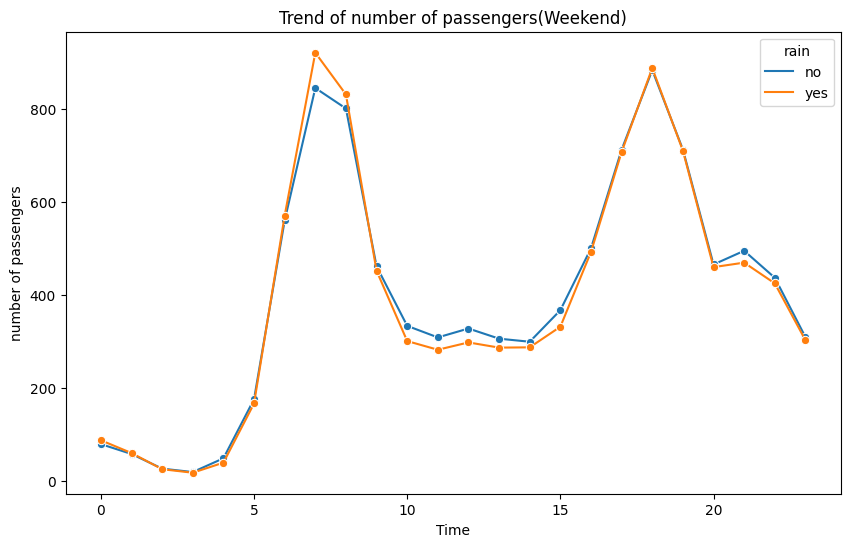

In [162]:
# Seaborn을 사용하여 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='시간', y='탑승인원', hue='강수여부', data=rain_df_weekday, marker='o')

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers(Weekend)')
plt.xlabel('Time')
plt.ylabel('number of passengers')

# 범례 추가
plt.legend(title='rain')

# 그래프 표시
plt.show()

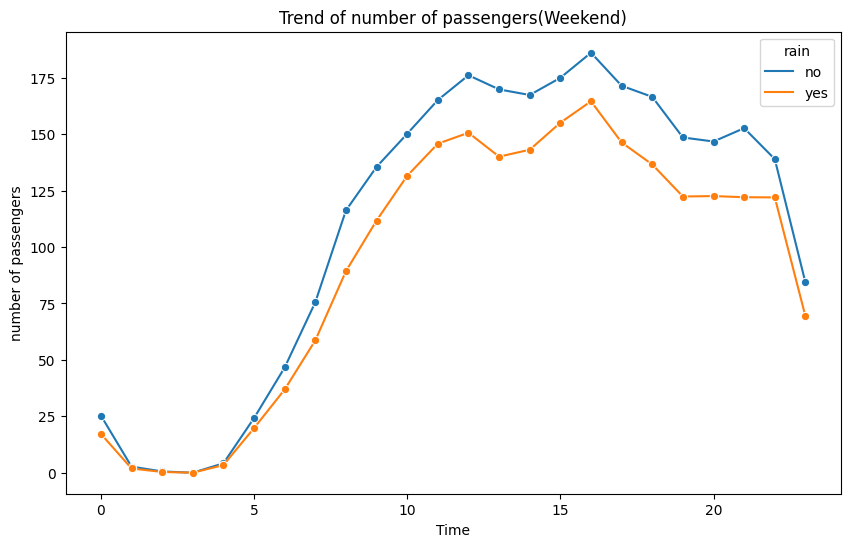

In [163]:
# Seaborn을 사용하여 꺾은선 그래프 그리기
plt.figure(figsize=(10, 6))
sns.lineplot(x='시간', y='탑승인원', hue='강수여부', data=rain_df_weekend, marker='o')

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers(Weekend)')
plt.xlabel('Time')
plt.ylabel('number of passengers')

# 범례 추가
plt.legend(title='rain')

# 그래프 표시
plt.show()

# 2. 기온이 낮은 날과 기온이 높은 날의 시간별 탑승인원 추이

In [164]:
# 평일
low_temp_weekday = df_weather_weekday[df_weather_weekday['기온']<5]
low_temp_weekday = low_temp_weekday['날짜']
low_temp_weekday = pd.DataFrame(low_temp_weekday, columns=['날짜'])
print(low_temp_weekday)

high_temp_weekday = df_weather_weekday[df_weather_weekday['기온']>24]
high_temp_weekday = high_temp_weekday['날짜']
high_temp_weekday = pd.DataFrame(high_temp_weekday, columns=['날짜'])
print(high_temp_weekday)

# 주말
low_temp_weekend = df_weather_weekend[df_weather_weekend['기온']<24]
low_temp_weekend = low_temp_weekend['날짜']
low_temp_weekend = pd.DataFrame(low_temp_weekend, columns=['날짜'])
print(low_temp_weekend)

high_temp_weekend = df_weather_weekend[df_weather_weekend['기온']>24]
high_temp_weekend = high_temp_weekend['날짜']
high_temp_weekend = pd.DataFrame(high_temp_weekend, columns=['날짜'])
print(high_temp_weekend)


             날짜
0    2022-03-01
1    2022-03-02
2    2022-03-03
4    2022-03-07
5    2022-03-08
14   2022-03-21
67   2022-12-01
68   2022-12-02
69   2022-12-05
70   2022-12-06
71   2022-12-07
72   2022-12-08
73   2022-12-09
74   2022-12-12
75   2022-12-13
76   2022-12-14
77   2022-12-15
78   2022-12-16
79   2022-12-19
80   2022-12-20
81   2022-12-21
82   2022-12-22
83   2022-12-23
84   2022-12-26
85   2022-12-27
86   2022-12-28
87   2022-12-29
88   2022-12-30
90   2023-03-02
91   2023-03-03
97   2023-03-13
100  2023-03-16
129  2023-09-04
130  2023-09-05
131  2023-09-06
132  2023-09-07
133  2023-09-08
134  2023-09-11
135  2023-09-12
136  2023-09-13
137  2023-09-14
138  2023-09-15
139  2023-09-18
140  2023-09-19
141  2023-09-20
142  2023-09-21
143  2023-09-22
144  2023-09-25
145  2023-09-26
146  2023-09-27
147  2023-09-28
148  2023-09-29
             날짜
31   2022-06-13
36   2022-06-20
37   2022-06-21
38   2022-06-22
39   2022-06-23
41   2022-06-27
42   2022-06-28
43   2022-06-29
46   202

In [165]:
# 기온여부 열 추가
# 평일
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(low_temp_weekday['날짜']), 'Temp'] = 'low'
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(high_temp_weekday['날짜']), 'Temp'] = 'high'
merge_df_weekday
# 주말
merge_df_weekend.loc[merge_df_weekend['날짜'].isin(low_temp_weekend['날짜']), 'Temp'] = 'low'
merge_df_weekend.loc[merge_df_weekend['날짜'].isin(high_temp_weekend['날짜']), 'Temp'] = 'high'

# 기온여부의 Null값인 행 삭제
merge_df_weekday_cleaned = merge_df_weekday.dropna(subset=['Temp'])
merge_df_weekend_cleaned = merge_df_weekend.dropna(subset=['Temp'])


In [166]:
# 기온여부별 시간별 그룹화하여 탑승인원 평균 구하기
#평일
temp_df_weekday = merge_df_weekday_cleaned.groupby(['시간', 'Temp'])['탑승인원'].mean().reset_index()
temp_df_weekday.head()

#주말

temp_df_weekend = merge_df_weekend_cleaned.groupby(['시간', 'Temp'])['탑승인원'].mean().reset_index()
temp_df_weekend.head()


,시간,Temp,탑승인원
0,0,high,19.753968
1,0,low,28.412698
2,1,high,1.761905
3,1,low,3.793651
4,10,high,137.190476


In [167]:
# 문자형의 시간 열 데이터를 숫자형으로 변환
temp_df_weekday['시간'] = pd.to_numeric(temp_df_weekday['시간'])
temp_df_weekend['시간'] = pd.to_numeric(temp_df_weekend['시간'])
# 데이터를 시간 순서대로 정렬
temp_df_weekday_sorted = temp_df_weekday.sort_values(by='시간')
temp_df_weekend_sorted = temp_df_weekend.sort_values(by='시간')

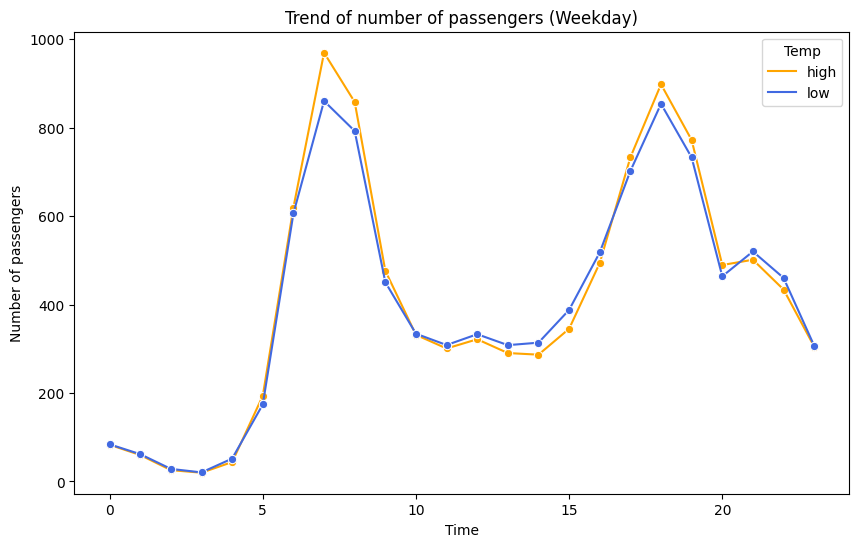

In [168]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='시간', y='탑승인원', hue='Temp', data=temp_df_weekday_sorted, marker='o',palette={'high': 'orange', 'low': 'royalblue'})

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers (Weekday)')
plt.xlabel('Time')
plt.ylabel('Number of passengers')
plt.savefig('기온추이그래프.png')

Text(0, 0.5, 'Number of passengers')

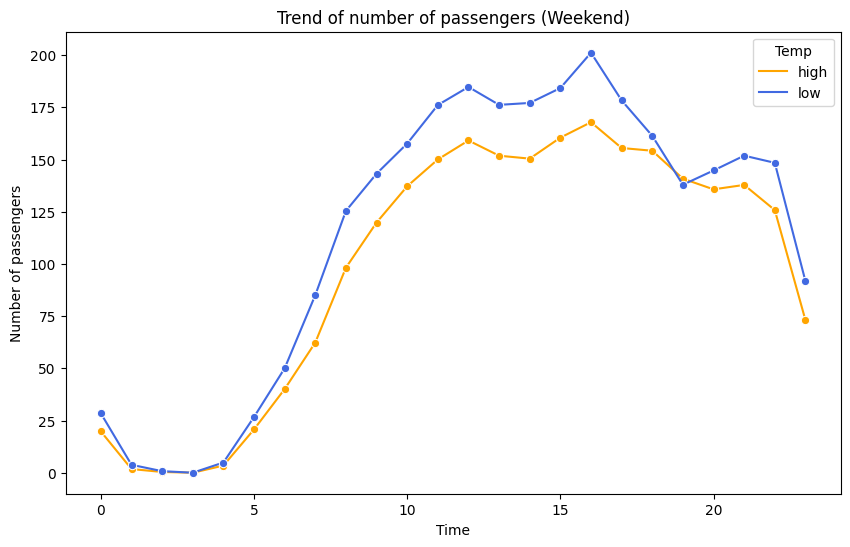

In [169]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='시간', y='탑승인원', hue='Temp', data=temp_df_weekend_sorted, marker='o',palette={'high': 'orange', 'low': 'royalblue'})

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers (Weekend)')
plt.xlabel('Time')
plt.ylabel('Number of passengers')

# 3. 습도가 낮은 날과 습도가 높은 날의 시간별 탑승인원 추이

In [170]:
# 평일
low_hum_weekday = df_weather_weekday[df_weather_weekday['습도']<45]
low_hum_weekday = low_hum_weekday['날짜']
low_hum_weekday = pd.DataFrame(low_hum_weekday, columns=['날짜'])
print(low_hum_weekday)

high_hum_weekday = df_weather_weekday[df_weather_weekday['습도']>80]
high_hum_weekday = high_hum_weekday['날짜']
high_hum_weekday = pd.DataFrame(high_hum_weekday, columns=['날짜'])
print(high_hum_weekday)

# 주말

low_hum_weekend = df_weather_weekend[df_weather_weekend['습도']<70]
low_hum_weekend = low_hum_weekend['날짜']
low_hum_weekend = pd.DataFrame(low_hum_weekend, columns=['날짜'])
print(low_hum_weekend)

high_hum_weekend = df_weather_weekend[df_weather_weekend['습도']>80]
high_hum_weekend = high_hum_weekend['날짜']
high_hum_weekend = pd.DataFrame(high_hum_weekend, columns=['날짜'])
print(high_hum_weekend)

             날짜
19   2022-03-28
23   2022-06-01
90   2023-03-02
97   2023-03-13
98   2023-03-14
100  2023-03-16
101  2023-03-17
103  2023-03-21
106  2023-03-24
107  2023-03-27
             날짜
0    2022-03-01
9    2022-03-14
33   2022-06-15
39   2022-06-23
44   2022-06-30
47   2022-09-05
48   2022-09-06
65   2022-09-29
70   2022-12-06
74   2022-12-12
75   2022-12-13
77   2022-12-15
81   2022-12-21
85   2022-12-27
88   2022-12-30
95   2023-03-09
113  2023-06-02
126  2023-06-21
127  2023-06-22
129  2023-09-04
130  2023-09-05
131  2023-09-06
132  2023-09-07
133  2023-09-08
134  2023-09-11
135  2023-09-12
136  2023-09-13
137  2023-09-14
138  2023-09-15
139  2023-09-18
140  2023-09-19
141  2023-09-20
142  2023-09-21
143  2023-09-22
144  2023-09-25
145  2023-09-26
146  2023-09-27
147  2023-09-28
148  2023-09-29
           날짜
6  2023-09-23
7  2023-09-24
           날짜
1  2023-09-03
4  2023-09-16
5  2023-09-17


In [171]:
# 습도여부 열 추가
# 평일
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(low_hum_weekday['날짜']), 'Hum'] = 'low'
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(high_hum_weekday['날짜']), 'Hum'] = 'high'
merge_df_weekday

# 주말

merge_df_weekend.loc[merge_df_weekend['날짜'].isin(low_hum_weekend['날짜']), 'Hum'] = 'low'
merge_df_weekend.loc[merge_df_weekend['날짜'].isin(high_hum_weekend['날짜']), 'Hum'] = 'high'
merge_df_weekend

# 습도여부의 Null값인 행 삭제
merge_df_weekday_cleaned = merge_df_weekday.dropna(subset=['Hum'])
merge_df_weekend_cleaned = merge_df_weekend.dropna(subset=['Hum'])

In [172]:
# 습도여부별 시간별 그룹화하여 탑승인원 평균 구하기
#평일
hum_df_weekday = merge_df_weekday_cleaned.groupby(['시간', 'Hum'])['탑승인원'].mean().reset_index()
hum_df_weekday.head()

#주말
hum_df_weekend = merge_df_weekend_cleaned.groupby(['시간', 'Hum'])['탑승인원'].mean().reset_index()
hum_df_weekend.head()

,시간,Hum,탑승인원
0,0,high,17.777778
1,0,low,27.047619
2,1,high,1.857143
3,1,low,3.214286
4,10,high,140.190476


In [173]:
# 문자형의 시간 열 데이터를 숫자형으로 변환
hum_df_weekday['시간'] = pd.to_numeric(hum_df_weekday['시간'])
hum_df_weekend['시간'] = pd.to_numeric(hum_df_weekend['시간'])
# 데이터를 시간 순서대로 정렬
hum_df_weekday_sorted = hum_df_weekday.sort_values(by='시간')
hum_df_weekend_sorted = hum_df_weekend.sort_values(by='시간')

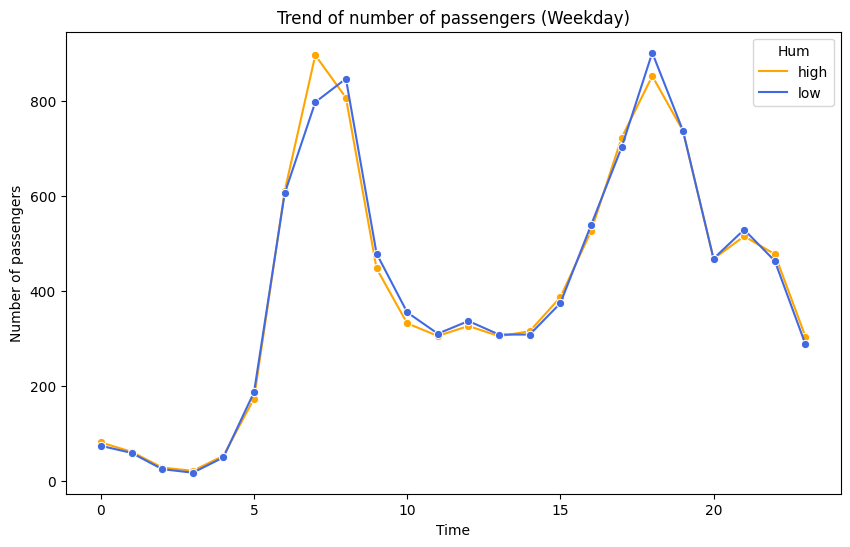

In [174]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='시간', y='탑승인원', hue='Hum', data=hum_df_weekday_sorted, marker='o',palette={'high': 'orange', 'low': 'royalblue'})

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers (Weekday)')
plt.xlabel('Time')
plt.ylabel('Number of passengers')
plt.savefig('습도추이그래프.png')

Text(0, 0.5, 'Number of passengers')

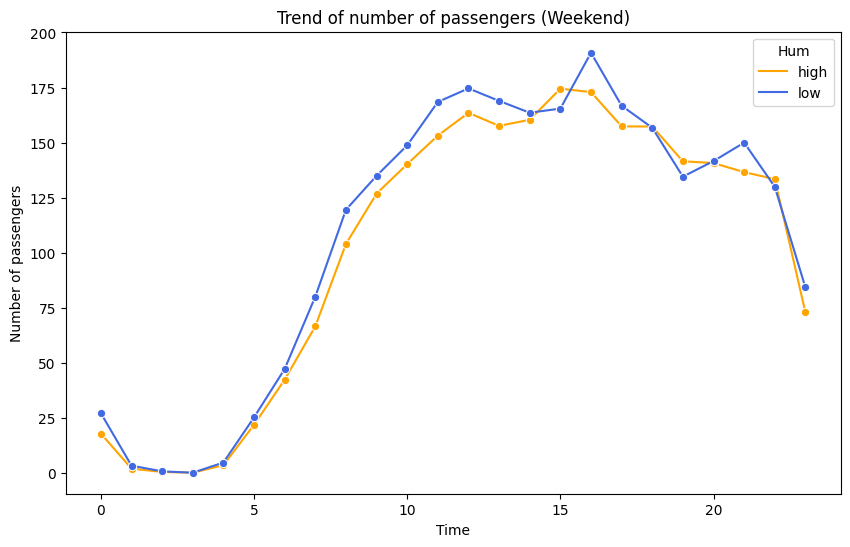

In [175]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='시간', y='탑승인원', hue='Hum', data=hum_df_weekend_sorted, marker='o',palette={'high': 'orange', 'low': 'royalblue'})

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers (Weekend)')
plt.xlabel('Time')
plt.ylabel('Number of passengers')

#  풍속이 낮은 날과 풍속이 높은 날의 시간별 탑승인원 추이

In [176]:
df_weather_weekday['풍속'] = pd.to_numeric(df_weather_weekday['풍속'], errors='coerce')
df_weather_weekend['풍속'] = pd.to_numeric(df_weather_weekend['풍속'], errors='coerce')
# 평일
low_wind_weekday = df_weather_weekday[df_weather_weekday['풍속']<1]
low_wind_weekday = low_wind_weekday['날짜']
low_wind_weekday = pd.DataFrame(low_wind_weekday, columns=['날짜'])
print(low_wind_weekday)

high_wind_weekday = df_weather_weekday[df_weather_weekday['풍속']>3]
high_wind_weekday = high_wind_weekday['날짜']
high_wind_weekday = pd.DataFrame(high_wind_weekday, columns=['날짜'])
print(high_wind_weekday)

# 주말

low_wind_weekend = df_weather_weekend[df_weather_weekend['풍속']<1]
low_wind_weekend = low_wind_weekend['날짜']
low_wind_weekend = pd.DataFrame(low_wind_weekend, columns=['날짜'])
print(low_wind_weekend)

high_wind_weekend = df_weather_weekend[df_weather_weekend['풍속']>2]
high_wind_weekend = high_wind_weekend['날짜']
high_wind_weekend = pd.DataFrame(high_wind_weekend, columns=['날짜'])
print(high_wind_weekend)

            날짜
8   2022-03-11
19  2022-03-28
52  2022-09-12
63  2022-09-27
66  2022-09-30
72  2022-12-08
84  2022-12-26
            날짜
3   2022-03-04
13  2022-03-18
32  2022-06-14
40  2022-06-24
42  2022-06-28
43  2022-06-29
48  2022-09-06
55  2022-09-15
57  2022-09-19
82  2022-12-22
83  2022-12-23
90  2023-03-02
           날짜
4  2023-09-16
           날짜
7  2023-09-24


In [177]:
# 풍속여부 열 추가
# 평일
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(low_wind_weekday['날짜']), 'Wind'] = 'low'
merge_df_weekday.loc[merge_df_weekday['날짜'].isin(high_wind_weekday['날짜']), 'Wind'] = 'high'
merge_df_weekday

# 주말

merge_df_weekend.loc[merge_df_weekend['날짜'].isin(low_wind_weekend['날짜']), 'Wind'] = 'low'
merge_df_weekend.loc[merge_df_weekend['날짜'].isin(high_wind_weekend['날짜']), 'Wind'] = 'high'
merge_df_weekend

# 풍속여부의 Null값인 행 삭제 (평균풍속 1이상 2 이하인 날짜 제외)
merge_df_weekday_cleaned = merge_df_weekday.dropna(subset=['Wind'])
merge_df_weekend_cleaned = merge_df_weekend.dropna(subset=['Wind'])

In [178]:
# 풍속여부별 시간별 그룹화하여 탑승인원 평균 구하기
#평일

wind_df_weekday = merge_df_weekday_cleaned.groupby(['시간', 'Wind'])['탑승인원'].mean().reset_index()
wind_df_weekday.head()

#주말

wind_df_weekend = merge_df_weekend_cleaned.groupby(['시간', 'Wind'])['탑승인원'].mean().reset_index()
wind_df_weekend.head()


,시간,Wind,탑승인원
0,0,high,10.000000
1,0,low,31.142857
2,1,high,0.428571
3,1,low,4.952381
4,10,high,126.142857


In [179]:
# 문자형의 시간 열 데이터를 숫자형으로 변환
wind_df_weekday['시간'] = pd.to_numeric(wind_df_weekday['시간'])
wind_df_weekend['시간'] = pd.to_numeric(wind_df_weekend['시간'])
# 데이터를 시간 순서대로 정렬
wind_df_weekday_sorted = wind_df_weekday.sort_values(by='시간')
wind_df_weekend_sorted = wind_df_weekend.sort_values(by='시간')

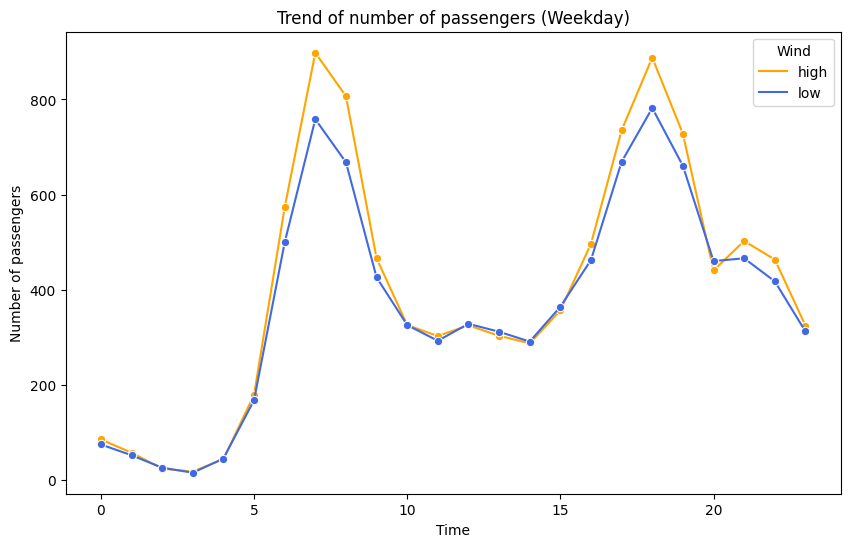

In [180]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='시간', y='탑승인원', hue='Wind', data=wind_df_weekday_sorted, marker='o',palette={'high': 'orange', 'low': 'royalblue'})

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers (Weekday)')
plt.xlabel('Time')
plt.ylabel('Number of passengers')
plt.savefig('풍속추이그래프.png')

Text(0, 0.5, 'Number of passengers')

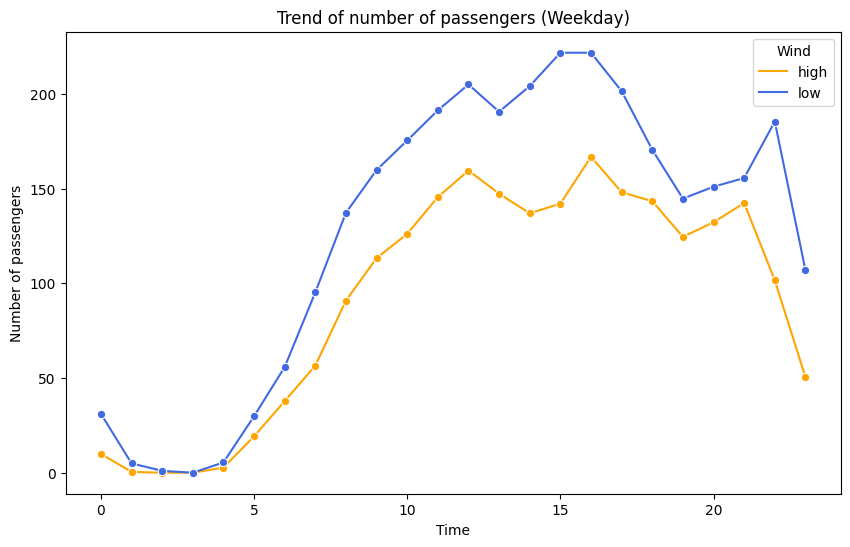

In [181]:
# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 꺾은선 그래프 그리기
sns.lineplot(x='시간', y='탑승인원', hue='Wind', data=wind_df_weekend_sorted, marker='o',palette={'high': 'orange', 'low': 'royalblue'})

# 그래프 제목 및 라벨 추가
plt.title('Trend of number of passengers (Weekday)')
plt.xlabel('Time')
plt.ylabel('Number of passengers')